# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#neuer test
#test
#import needed libs
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Softmax
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import os
import numpy as np
import matplotlib.pyplot as plt


#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



170500096/170498071 [==============================] - 49s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
y_train[0]

array([6], dtype=uint8)

In [3]:
type(np.uint8(6))

numpy.uint8

In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
np.shape(y_train)

(50000, 10)

In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

In [6]:
np.argmax(y_train,axis=1)

array([6, 9, 9, ..., 9, 1, 1])

<Figure size 432x288 with 0 Axes>

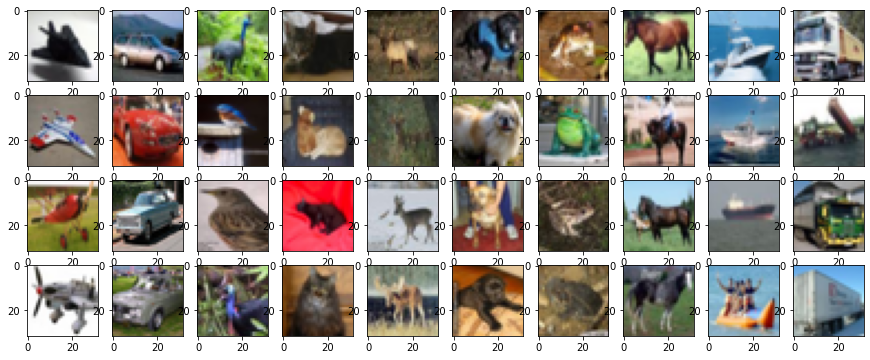

In [7]:
#class_no = 3
#class_zero=x_train[np.argmax(y_train,axis=1)==class_no]
#print(np.shape(class_zero))

plt.figure()
f,axarr = plt.subplots(4,num_classes,figsize=(15,6))
for class_no in range(num_classes):
  i=0
  x_class=x_train[np.argmax(y_train,axis=1)==class_no]
  while i<4:

    axarr[i][class_no].imshow(x_class[i,:,:,:])
    i=i+1


In [8]:
inputs = keras.Input(shape=(32,32,3))
l1= Rescaling(scale=1.0/255)(inputs)

l2= Conv2D(filters=96,kernel_size=(3,3),activation="relu",strides=4)(l1)
l3= MaxPooling2D(pool_size=(3,3),strides=1)(l2)


l4= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l3)
l5= MaxPooling2D(pool_size=(3,3),strides=1)(l4)


l6= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l5)

l7= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l6)

l8= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l7)
l9= MaxPooling2D(pool_size=(3,3),strides=2)(l8)

l10=Dense(4096,activation='relu')(l9)

l11=Dense(4096,activation='relu')(l10)

outputs=Dense(num_classes,activation='softmax')(l11)


In [9]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
processed_data = model(x_train[0:100,:,:,:])
print(processed_data.shape)


(100, 1, 1, 10)


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 256)         221440    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 384)         885120

In [12]:
#weniger Parameter
inputs = keras.Input(shape=(32,32,3))
l1= Rescaling(scale=1.0/255)(inputs)

l2= Conv2D(filters=96,kernel_size=(3,3),activation="relu",strides=4)(l1)
l3= MaxPooling2D(pool_size=(3,3),strides=1)(l2)


l4= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l3)
l5= MaxPooling2D(pool_size=(3,3),strides=1)(l4)


l6= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l5)
l7= MaxPooling2D(pool_size=(3,3),strides=2)(l6)

l8=Flatten()(l7)
l9=Dense(4096,activation='relu')(l8)

outputs=Dense(num_classes,activation='softmax')(l9)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 256)         221440    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         5900

In [13]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics = ['accuracy'])

In [14]:
np.shape(y_train)

(50000, 10)

In [15]:
history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6569 - accuracy: 0.3790
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3667 - accuracy: 0.5044
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2438 - accuracy: 0.5527
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1568 - accuracy: 0.5846
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0874 - accuracy: 0.6125
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0345 - accuracy: 0.6316
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9782 - accuracy: 0.6512
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9330 - accuracy: 0.6673
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8853 - accuracy: 0.6837
Epoch 10/10
1563/1563 [==============================] - 13s 9ms/step - l

In [16]:
loss,acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1586 - accuracy: 0.6157


**Dinge die man sich noch anschauen kann, um Ergebnis zu verbessern:**
- evtl zusätzlich Dropoutlayer gegen Overfittung
- geringere pooling kernel um mehr informationen beizubehalten und somit genauer zu lernen
- testen was passiert wenn dense_layer mit 4096 Neuronen weggelassen wird.
- Batch normalization layers hinzufügen?

In [29]:
#eigentliches AlexNet

# inputs = keras.Input(shape=(32,32,3))
# l1= Rescaling(scale=1.0/255)(inputs)

# l2= Conv2D(filters=96,kernel_size=(11,11),activation="relu",strides=4)(l1)
# l3= MaxPooling2D(pool_size=(3,3),strides=2)(l2)


# l4= Conv2D(filters=256,kernel_size=(5,5),activation="relu",strides=1,padding="same")(l3)
# l5= MaxPooling2D(pool_size=(3,3),strides=2)(l4)


# l6= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l5)

# l7= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l6)

# l8= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l7)
# l9= MaxPooling2D(pool_size=(3,3),strides=2)(l8)

# l10=Dense(4096,activation='relu')(l9)

# l11=Dense(4096,activation='relu')(l10)

# l12=Dense(num_classes,activation='softmax')(l11)

